# S2 Notes / Clangs

3C6 Section 2: What makes a note vs a clang?

## imports and definitions

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
matplotlib.rcParams.update({'font.size': 12,'font.family':'serif'})
from ipywidgets import interact

import sounddevice as sd

In [2]:
%matplotlib notebook

## Setup parameters

In [3]:
fs = 44.1e3
T = 3
t = np.arange(0,T,1/fs)

detuning = 0.5

## Create notes

In [4]:
f1 = 82.4
Nh = 20

decay_window = np.exp(-t/(T/3))

y_note  = np.zeros_like(t)
y_clang = np.zeros_like(t)

for n in range(1,Nh+1):
    y_note = y_note + 1/n * np.sin(n*2*np.pi*f1*t)
    
    if n != 1:
        nc = n + detuning*np.random.uniform(-1,1,1)
    else:
        nc = 1
    
    y_clang = y_clang + 1/n*np.sin(nc*2*np.pi*f1*t)


y_note  = y_note  * decay_window
y_note = y_note / np.abs(np.max(y_note))/3
y_clang = y_clang * decay_window
y_clang = y_clang / np.abs(np.max(y_clang))/3

## Play notes

In [5]:
sd.play(y_note,samplerate=fs)

In [6]:
sd.play(y_clang,samplerate=fs)

## Plot FFT

In [7]:
Y_note = np.fft.fft(y_note)
Y_clang = np.fft.fft(y_clang)
N = t.size
freq = np.linspace(0,fs*(N-1)/N,N)

<IPython.core.display.Javascript object>


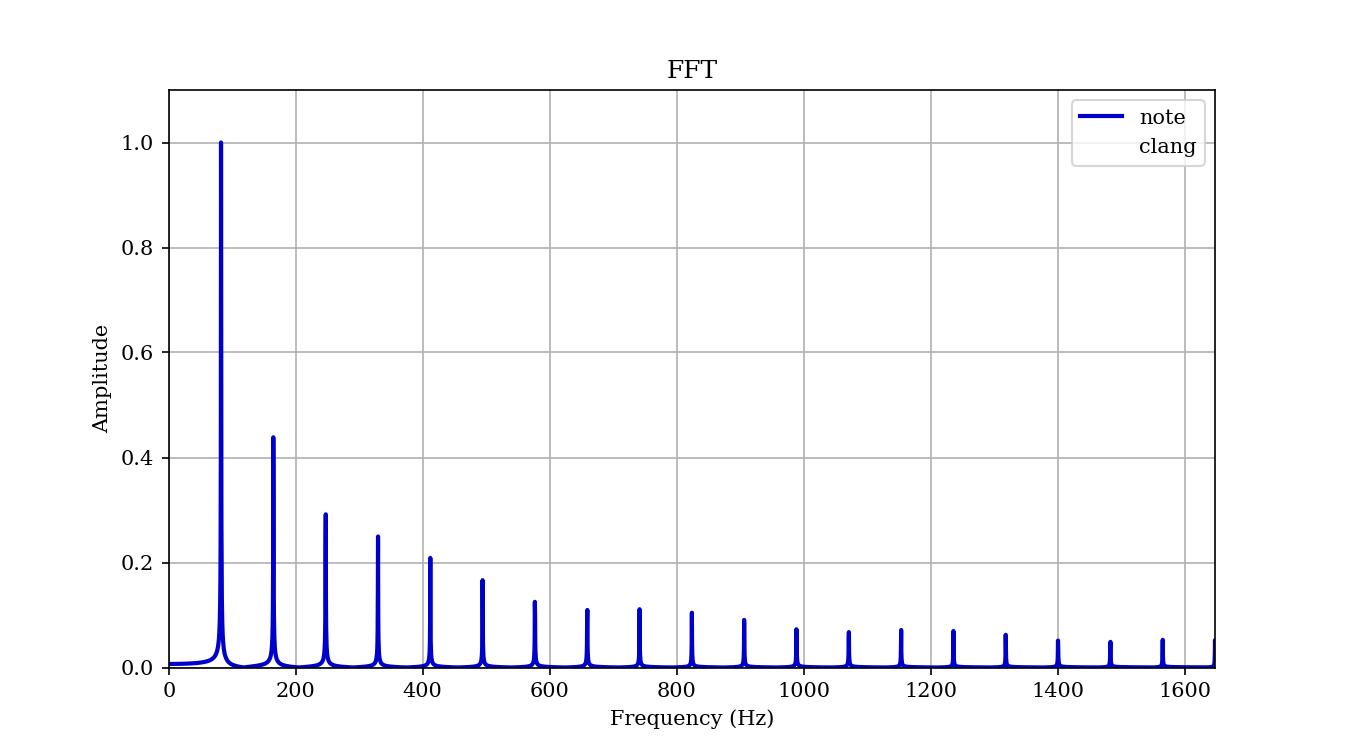

interactive(children=(Checkbox(value=True, description='note'), Checkbox(value=False, description='clang'), Ou…

<function __main__.plot(note, clang)>

In [8]:
plt.figure(figsize=(9,5),dpi=100)
plt.grid()
p1 = plt.plot(freq,np.abs(Y_note)/np.max(np.abs(Y_note)),'-',linewidth=2,color = [0, 0, 0.8],label="note",alpha=True)
p2 = plt.plot(freq,np.abs(Y_clang)/np.max(np.abs(Y_clang)),'--',linewidth=2,color = [0.8, 0, 0],label="clang",alpha=False)
plt.legend(loc=1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT")
plt.xlim([0,Nh*f1])
plt.ylim([0,1.1])

def plot(note,clang):
    p1[0].set_alpha(note)
    p2[0].set_alpha(clang)
    plt.legend()

interact(plot, note=True, clang=False) 



In [9]:
p1

In [11]:
l1 = p1[0]


In [ ]:
l1.